# Submetric: Income
---
## Aggregate Income per Household (2015):
This data has been adjusted for inflation.
* My plan is to find the total income of each neighborhood and divide it by the total population of each neighborhood to get an idea of how much income per person there is, which will be the main factor in determining this submetric.

In [1]:
import pandas as pd

inc = pd.read_csv('aggregate-household-income.csv')
pop = pd.read_csv('total-population.csv')

df = pd.merge(inc,pop,how='outer',on='Neighborhood')


df.head(10)


,Neighborhood,Id_x,Aggregate_Income,MOE_x,Id_y,Population,MOE_y
0,Allegheny Center,1,39947000,6437773,1,1411,196.000000
1,Allegheny West,2,23793300,22025939,2,343,96.000000
2,Allentown,3,38303700,7490207.043,3,2558,449.773276
3,Arlington,4,35349900,6140662.723,4,1852,348.188168
4,Arlington Heights,5,2389600,1162393,5,272,126.000000
5,Banksville,6,138084700,25839798.58,6,3858,581.107563
6,Bedford Dwellings,7,10529100,1666825,7,1349,180.000000
7,Beechview,8,193055900,20558893.78,8,8078,719.658252
8,Beltzhoover,9,28121300,6955896.138,9,1702,343.072879
9,Bloomfield,10,249898900,17631530.8,10,8669,491.348145


# Organizing the Data:

In [2]:
data = pd.DataFrame(columns=['Town','Aggregate_Income','Population'])

data['Town'] = inc['Neighborhood']
data['Aggregate_Income'] = inc['Aggregate_Income']
data['Population'] = pop['Population']


In [3]:
#this code is used for the scatterplot shown below
income = []
for value in data['Aggregate_Income']:
    try:
        currInc = int(value)
        income.append(currInc / 1000000)
    except:
        income.append(0)



data['Aggregate_Income_in_Millions'] = income

In [4]:
data.head(20)

,Town,Aggregate_Income,Population,Aggregate_Income_in_Millions
0,Allegheny Center,39947000,1411,39.9470
1,Allegheny West,23793300,343,23.7933
2,Allentown,38303700,2558,38.3037
3,Arlington,35349900,1852,35.3499
4,Arlington Heights,2389600,272,2.3896
5,Banksville,138084700,3858,138.0847
6,Bedford Dwellings,10529100,1349,10.5291
7,Beechview,193055900,8078,193.0559
8,Beltzhoover,28121300,1702,28.1213
9,Bloomfield,249898900,8669,249.8989


# Now we've got a DataFrame containing only the Town name, Population, and Aggregate Income in Millions

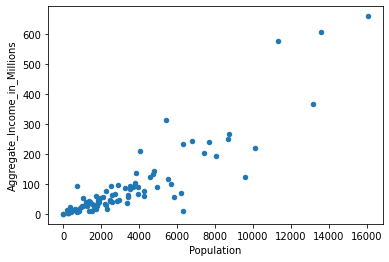

In [5]:
data.plot.scatter(x='Population',y='Aggregate_Income_in_Millions')

In [6]:
incdivpop = []
poplist = data['Population']
inclist = data['Aggregate_Income']
for p, i in zip(poplist,inclist):
    try:
        currIncy = int(i)
        currPopy = int(p)
        incdivpop.append(int(currIncy/currPopy))
    except:
        incdivpop.append(0)

data['Income_per_Person'] = incdivpop
data.head(5)


,Town,Aggregate_Income,Population,Aggregate_Income_in_Millions,Income_per_Person
0,Allegheny Center,39947000,1411,39.9470,28311
1,Allegheny West,23793300,343,23.7933,69368
2,Allentown,38303700,2558,38.3037,14974
3,Arlington,35349900,1852,35.3499,19087
4,Arlington Heights,2389600,272,2.3896,8785


# Note that Income per Person is rounded to the floor. 

In [7]:
data.drop({'Aggregate_Income','Population','Aggregate_Income_in_Millions'}, axis=1, inplace=True)


In [8]:
data.head(10)

,Town,Income_per_Person
0,Allegheny Center,28311
1,Allegheny West,69368
2,Allentown,14974
3,Arlington,19087
4,Arlington Heights,8785
5,Banksville,35791
6,Bedford Dwellings,7805
7,Beechview,23898
8,Beltzhoover,16522
9,Bloomfield,28826


In [9]:
#this is a list of the indexes of all the Towns protected by CPBP
indexlist = [18,80,17,47,86,65,72,73,8,15,78,4,19,26,70,88,76,77,58,63,64,28,39,40,41,42,87,5,13,7]
data = data.iloc[indexlist]

# Have to consolidate the repeats into a single Town


In [10]:
lville = data.loc[data['Town'].isin(['Central Lawrenceville', 'Lower Lawrenceville', 'Upper Lawrenceville'])]
average = lville['Income_per_Person'].mean()
lvillerow = pd.DataFrame({'Town': ['Lawrenceville'], 'Income_per_Person': [average]})
data = pd.concat([data,lvillerow], ignore_index=True)
data = data.drop(data[data['Town'].isin(['Central Lawrenceville', 'Lower Lawrenceville', 'Upper Lawrenceville'])].index).reset_index(drop=True)

In [11]:
#southside
sside = data.loc[data['Town'].isin(['South Side Flats', 'South Side Slopes'])]
average = sside['Income_per_Person'].mean()
ssiderow = pd.DataFrame({'Town': ['Southside'], 'Income_per_Person': [average]})
data = pd.concat([data,ssiderow], ignore_index=True)
data = data.drop(data[data['Town'].isin(['South Side Flats', 'South Side Slopes'])].index).reset_index(drop=True)



In [12]:
#oakland
oland = data.loc[data['Town'].isin(['South Oakland', 'North Oakland', 'West Oakland', 'Central Oakland'])]
average = oland['Income_per_Person'].mean()
olandrow = pd.DataFrame({'Town': ['Oakland'], 'Income_per_Person': [average]})
data = pd.concat([data,olandrow], ignore_index=True)
data = data.drop(data[data['Town'].isin(['South Oakland', 'North Oakland', 'West Oakland', 'Central Oakland'])].index).reset_index(drop=True)

In [13]:
#squirell hill
shill = data.loc[data['Town'].isin(['Squirrel Hill South', 'Squirrel Hill North'])]
average = shill['Income_per_Person'].mean()
shillrow = pd.DataFrame({'Town': ['Squirrel Hill'], 'Income_per_Person': [average]})
data = pd.concat([data,shillrow], ignore_index=True)
data = data.drop(data[data['Town'].isin(['Squirrel Hill South', 'Squirrel Hill North'])].index).reset_index(drop=True)

In [14]:
#point breeze
pbrez = data.loc[data['Town'].isin(['Point Breeze', 'Point Breeze North'])]
average = pbrez['Income_per_Person'].mean()
pbrezrow = pd.DataFrame({'Town': ['Point Breeze'], 'Income_per_Person': [average]})
data = data.drop(data[data['Town'].isin(['Point Breeze', 'Point Breeze North'])].index).reset_index(drop=True)
data = pd.concat([data,pbrezrow], ignore_index=True)



In [15]:
#homewood
hwood = data.loc[data['Town'].isin(['Homewood North', 'Homewood South', 'Homewood West'])]
average = hwood['Income_per_Person'].mean()
hwoodrow = pd.DataFrame({'Town': ['Home wood'], 'Income_per_Person': [average]})
data = data.drop(data[data['Town'].isin(['Homewood North', 'Homewood South', 'Homewood West'])].index).reset_index(drop=True)
data = pd.concat([data,hwoodrow], ignore_index=True)



In [16]:
data.head(21)

,Town,Income_per_Person
0,Central Northside,33317.000000
1,Strip District,122808.000000
2,Polish Hill,29217.000000
3,Beltzhoover,16522.000000
4,Carrick,21855.000000
5,St. Clair,14324.000000
6,Arlington Heights,8785.000000
7,East Carnegie,24500.000000
8,Northview Heights,5666.000000
9,East Liberty,20897.000000


# *Data on Downtown, and Uptown were not available

## Now lets assign a value from 0-1 to rank each Town based on their Income per Person

Average Income per Person among the Pittsburgh Towns:

In [17]:
totalavg = data['Income_per_Person'].mean()
print(totalavg)

29112.103174603177


Minimum Income per Person:

In [18]:
totalmin = data['Income_per_Person'].min()
print(totalmin)

5666.0


Maximum Income per Person:

In [19]:
totalmax = data['Income_per_Person'].max()
print(totalmax)

122808.0


In [20]:
listy = []
for value in data['Income_per_Person']:
    try:
        thisVal = ((float(value)-totalmin)/(totalmax-totalmin))
        listy.append(thisVal)
    except:
        listy.append(0)

data['Normalized Score'] = listy
        

## In descending order, these scores are:

In [21]:
data.sort_values('Normalized Score', ascending=False)

,Town,Income_per_Person,Normalized Score
1,Strip District,122808.000000,1.000000
19,Point Breeze,46284.500000,0.346746
18,Squirrel Hill,46037.500000,0.344637
12,Banksville,35791.000000,0.257167
10,Highland Park,35595.000000,0.255493
0,Central Northside,33317.000000,0.236047
16,Southside,32012.500000,0.224911
2,Polish Hill,29217.000000,0.201047
13,Brookline,27883.000000,0.189659
15,Lawrenceville,26310.666667,0.176236


## As we can see, by Average Aggregate Household Income per Person, *Strip District*, *Point Breeze*, *Squirrel Hill*, *Banksville*, and *Highland Park* are some of the best places to live around Pittsburgh. 

---
But don't count out the other towns! Make sure to consider all three submetrics when deciding which town is the best. 